In [54]:
#importing the basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('sample_data_intw.csv',index_col=False)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [55]:
df.isna().sum() 

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [56]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

###Converting the date column and the categorical columns

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["pcircle"]=le.fit_transform(df["pcircle"])

In [58]:
df['pdate']=df['pdate'].str.replace('-','')
df['pdate'] = pd.to_datetime(df['pdate'],format='%Y%m%d')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,2016-06-22


In [59]:
#Separating the day, month and year
df['pdate_day']=df['pdate'].dt.day
df['pdate_month']=df['pdate'].dt.month
df['pdate_year']=df['pdate'].dt.year

In [60]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,pdate_day,pdate_month,pdate_year
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,2016-07-20,20,7,2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,2016-08-10,10,8,2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,2016-08-19,19,8,2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,2016-06-06,6,6,2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,2016-06-22,22,6,2016


In [61]:
#dropping pdate
df=df.drop('pdate',axis=1)

Checking for constant, quasi-constant and primary key columns

In [62]:
df.shape

(209593, 39)

In [63]:
df['msisdn'].nunique() #dropping this column as it is a primary key

186243

In [64]:
df=df.drop('msisdn',axis=1)

###Checking for constant columns if any value is >90, and dropping them

In [65]:
df['last_rech_date_da'].value_counts()/209593
df=df.drop('last_rech_date_da',axis=1)

In [66]:
df['cnt_da_rech30'].value_counts()/209593

0.000000        0.980371
1.000000        0.011122
2.000000        0.001775
3.000000        0.000744
4.000000        0.000410
                  ...   
63823.301647    0.000005
32152.874529    0.000005
45934.211400    0.000005
57073.740639    0.000005
38828.342205    0.000005
Name: cnt_da_rech30, Length: 1066, dtype: float64

In [67]:
df=df.drop('cnt_da_rech30',axis=1)

In [68]:
df['fr_da_rech30'].value_counts()/209593

0.000000         0.992466
3.000000         0.000305
1.000000         0.000262
2.000000         0.000243
7.000000         0.000224
                   ...   
738055.326743    0.000005
811998.243560    0.000005
792892.884579    0.000005
540679.626283    0.000005
849620.029563    0.000005
Name: fr_da_rech30, Length: 1072, dtype: float64

In [69]:
df=df.drop('fr_da_rech30',axis=1)

In [70]:
df['cnt_da_rech90'].value_counts()/209593

0     0.974393
1     0.019910
2     0.002653
3     0.001083
4     0.000716
5     0.000353
6     0.000234
7     0.000172
8     0.000143
9     0.000086
14    0.000048
12    0.000033
11    0.000033
10    0.000029
13    0.000029
16    0.000019
18    0.000014
15    0.000010
30    0.000005
17    0.000005
19    0.000005
20    0.000005
22    0.000005
25    0.000005
27    0.000005
28    0.000005
38    0.000005
Name: cnt_da_rech90, dtype: float64

In [71]:
df=df.drop('cnt_da_rech90',axis=1)

In [72]:
df['fr_da_rech90'].value_counts()/209593

0     0.995873
3     0.000372
1     0.000315
2     0.000315
4     0.000267
7     0.000262
6     0.000248
5     0.000215
8     0.000210
10    0.000157
9     0.000153
14    0.000153
11    0.000143
12    0.000129
19    0.000105
28    0.000091
13    0.000081
15    0.000081
18    0.000076
29    0.000072
16    0.000067
17    0.000067
22    0.000052
25    0.000052
21    0.000048
20    0.000043
24    0.000038
27    0.000038
32    0.000038
26    0.000033
30    0.000033
31    0.000029
34    0.000024
23    0.000024
37    0.000024
57    0.000014
35    0.000010
41    0.000010
46    0.000005
56    0.000005
55    0.000005
33    0.000005
43    0.000005
42    0.000005
39    0.000005
64    0.000005
Name: fr_da_rech90, dtype: float64

In [73]:
df=df.drop('fr_da_rech90',axis=1)

In [74]:
df['medianamnt_loans30'].value_counts()/209593

0.0    0.932498
1.0    0.034109
0.5    0.031194
2.0    0.002004
1.5    0.000181
3.0    0.000014
Name: medianamnt_loans30, dtype: float64

In [75]:
df=df.drop('medianamnt_loans30',axis=1)

In [76]:
df['medianamnt_loans90'].value_counts()/209593

0.0    0.941940
1.0    0.029448
0.5    0.027043
2.0    0.001465
1.5    0.000091
3.0    0.000014
Name: medianamnt_loans90, dtype: float64

In [77]:
df=df.drop('medianamnt_loans90',axis=1)

In [78]:
#dropping the unnamed column
df = df.drop(df.columns[[0]], axis=1) 

In [79]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pcircle,pdate_day,pdate_month,pdate_year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,2,12,6.0,2.0,12,6,29.000000,29.000000,0,20,7,2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1,12,12.0,1.0,12,12,0.000000,0.000000,0,10,8,2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1,6,6.0,1.0,6,6,0.000000,0.000000,0,19,8,2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2,12,6.0,2.0,12,6,0.000000,0.000000,0,6,6,2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7,42,6.0,7.0,42,6,2.333333,2.333333,0,22,6,2016


###Performing EDA

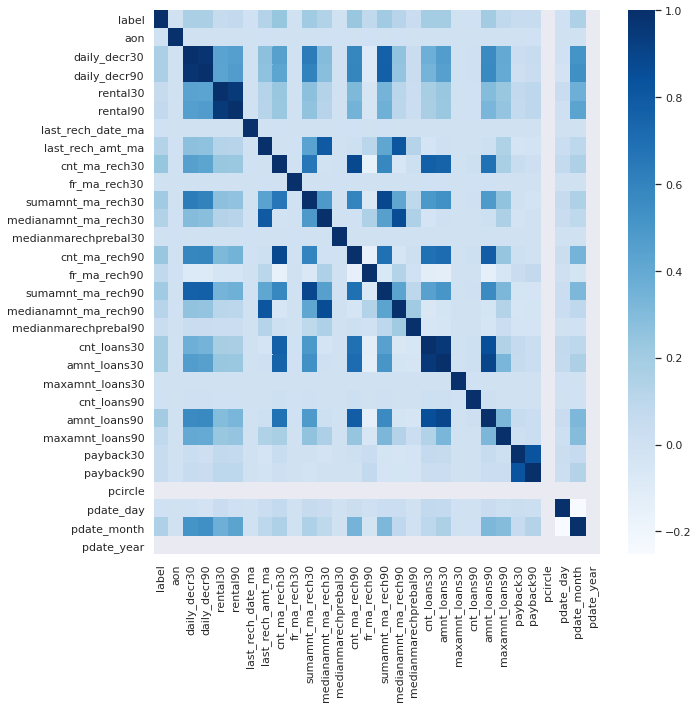

In [80]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(),cmap="Blues")
sns.set()
plt.show()

In [81]:
#since there is high correlation between columns of recharge in 30 days and 90 days, we will drop a set of each one.
df=df.drop('daily_decr30',axis=1)
df=df.drop('rental30',axis=1)
df=df.drop('payback30',axis=1)

In [82]:
df=df.drop('cnt_loans30',axis=1)
df=df.drop('amnt_loans30',axis=1)
df=df.drop('maxamnt_loans30',axis=1)

In [83]:
df.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans90,amnt_loans90,maxamnt_loans90,payback90,pcircle,pdate_day,pdate_month,pdate_year
0,0,272.0,3065.150000,260.13,2.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,2.0,12,6,29.000000,0,20,7,2016
1,1,712.0,12124.750000,3691.26,20.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1.0,12,12,0.000000,0,10,8,2016
2,1,535.0,1398.000000,900.13,3.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1.0,6,6,0.000000,0,19,8,2016
3,1,241.0,21.228000,159.42,41.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2.0,12,6,0.000000,0,6,6,2016
4,1,947.0,150.619333,1098.90,4.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7.0,42,6,2.333333,0,22,6,2016


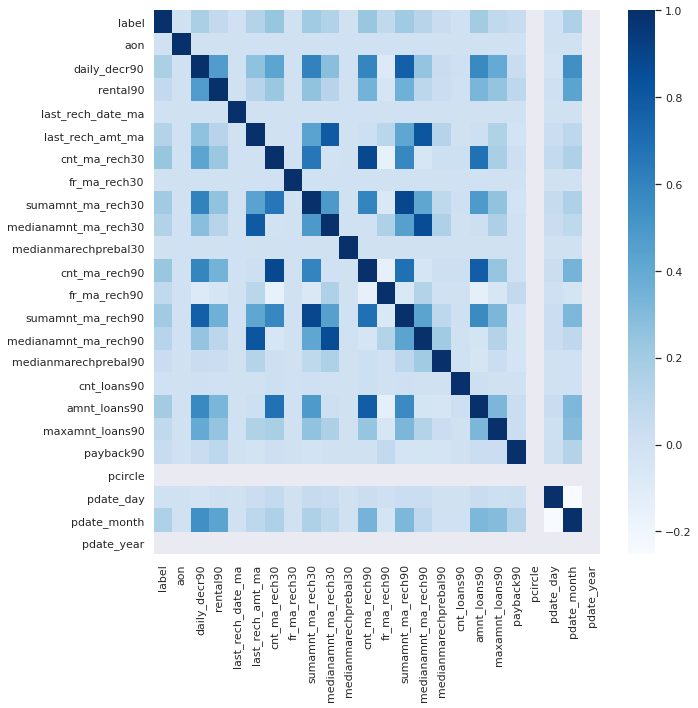

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(),cmap="Blues")
sns.set()
plt.show()

###Outlier Detection


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


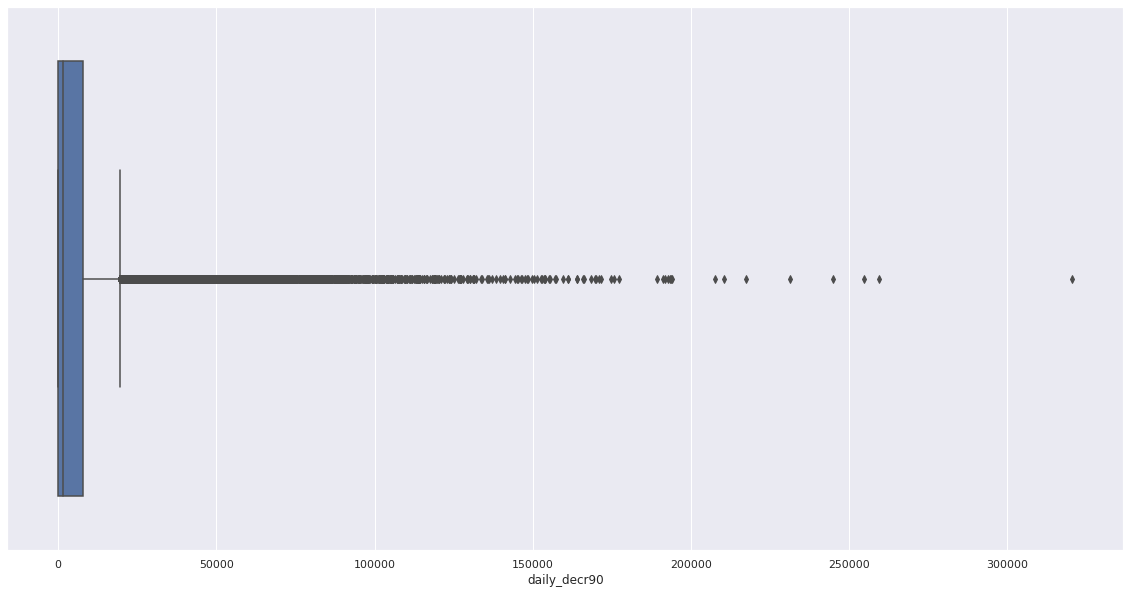

In [85]:
plt.figure(figsize=(20,10))
sns.boxplot(df["daily_decr90"])
plt.show()
#Removing some outliers

26244.257999999994


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


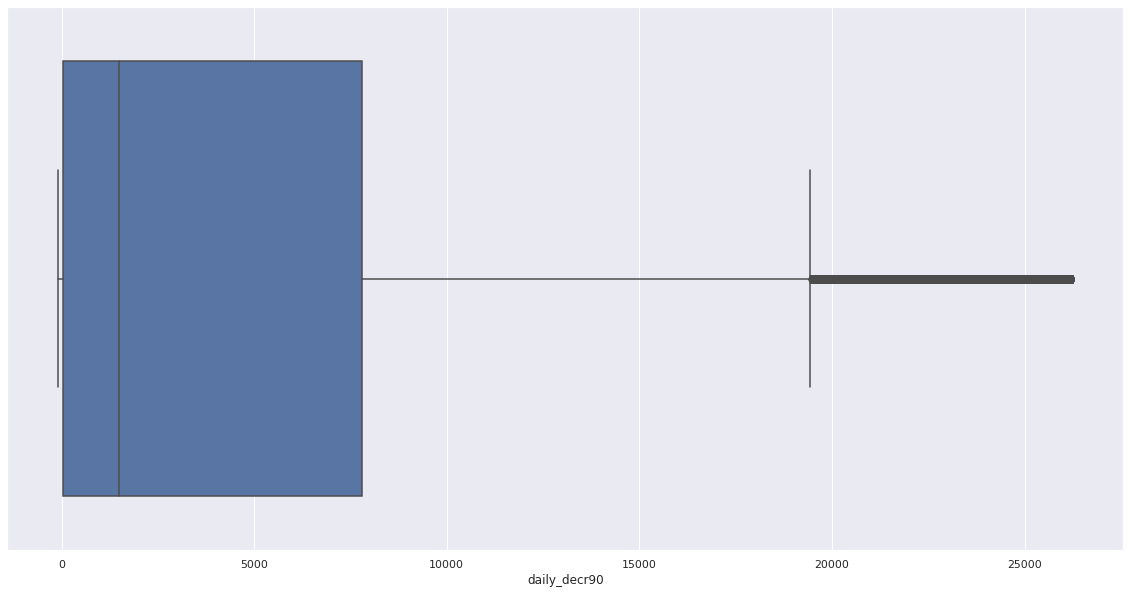

In [86]:
#IQR Treatment 
upperlim=df["daily_decr90"].quantile(0.95)
print(upperlim)
df.loc[(df["daily_decr90"]>upperlim),"daily_decr90"]=upperlim
plt.figure(figsize=(20,10))
sns.boxplot(df["daily_decr90"])
plt.show() #Improvement shown

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


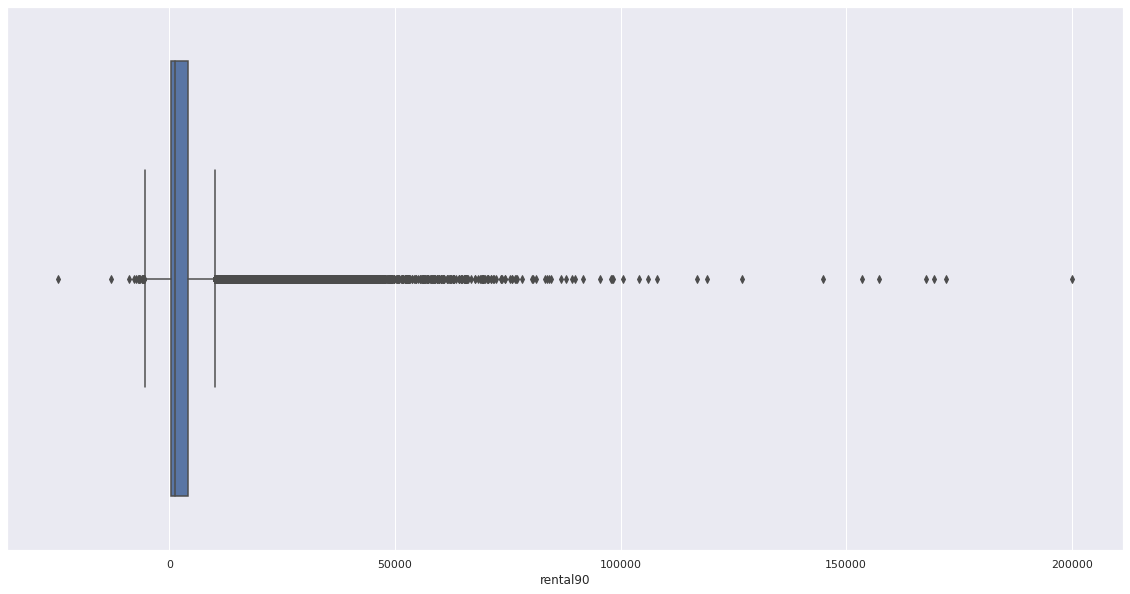

In [87]:
plt.figure(figsize=(20,10))
sns.boxplot(df["rental90"])
plt.show()

14642.973999999995


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


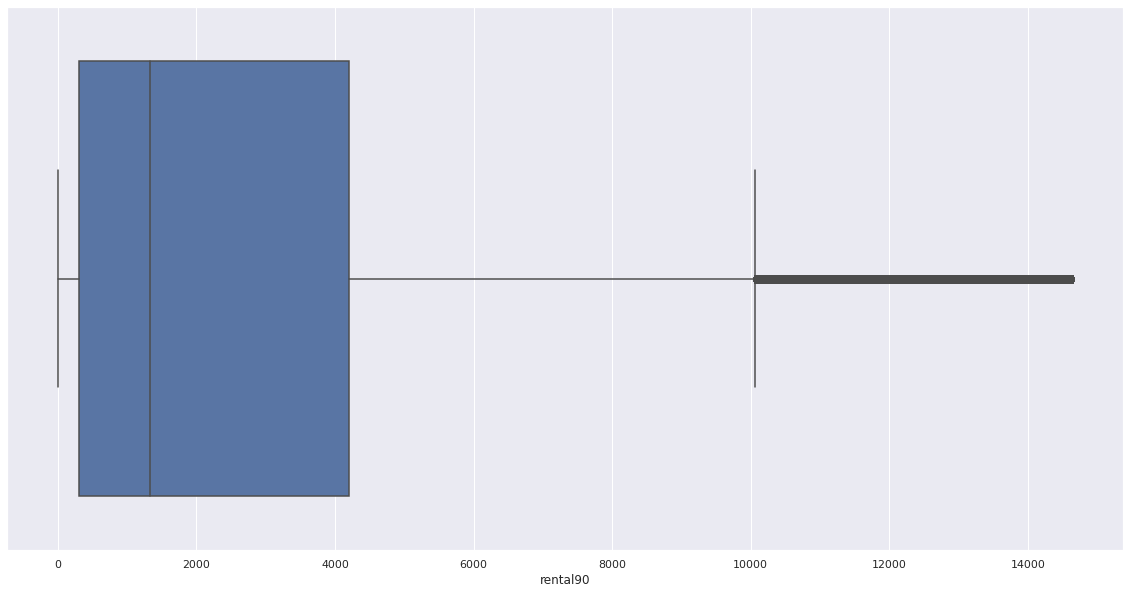

In [88]:
#IQR Treatment 
upperlim=df["rental90"].quantile(0.95)
print(upperlim)
lowerlim=df["rental90"].quantile(0.05)
df.loc[(df["rental90"]>upperlim),"rental90"]=upperlim
df.loc[(df["rental90"]<lowerlim),"rental90"]=lowerlim
plt.figure(figsize=(20,10))
sns.boxplot(df["rental90"])
plt.show() #Improvement shown

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


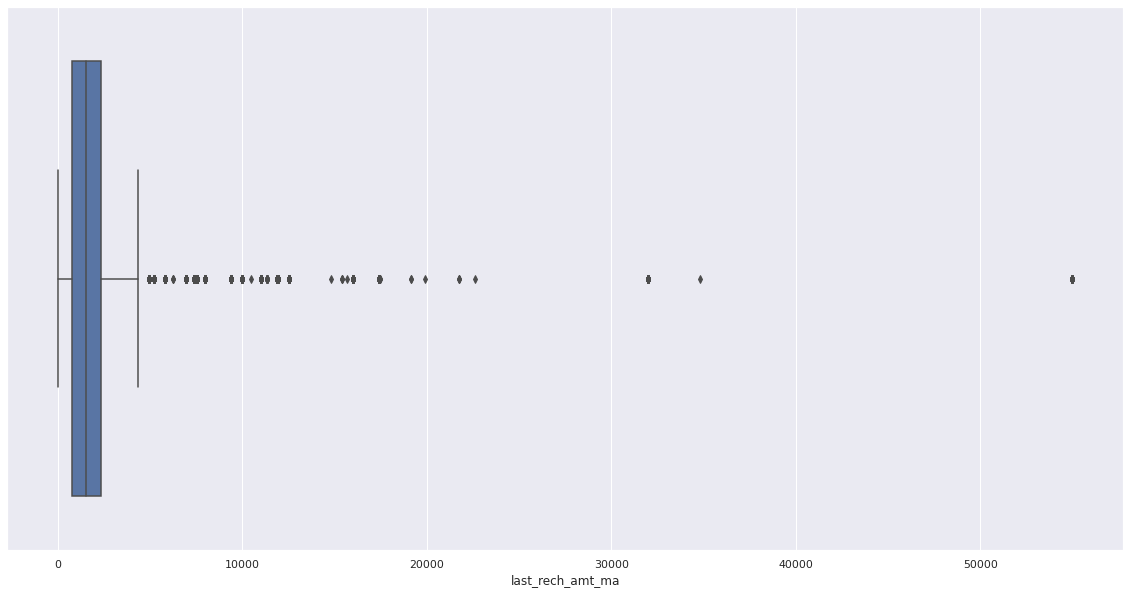

In [90]:
plt.figure(figsize=(20,10))
sns.boxplot(df["last_rech_amt_ma"])
plt.show()

8000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


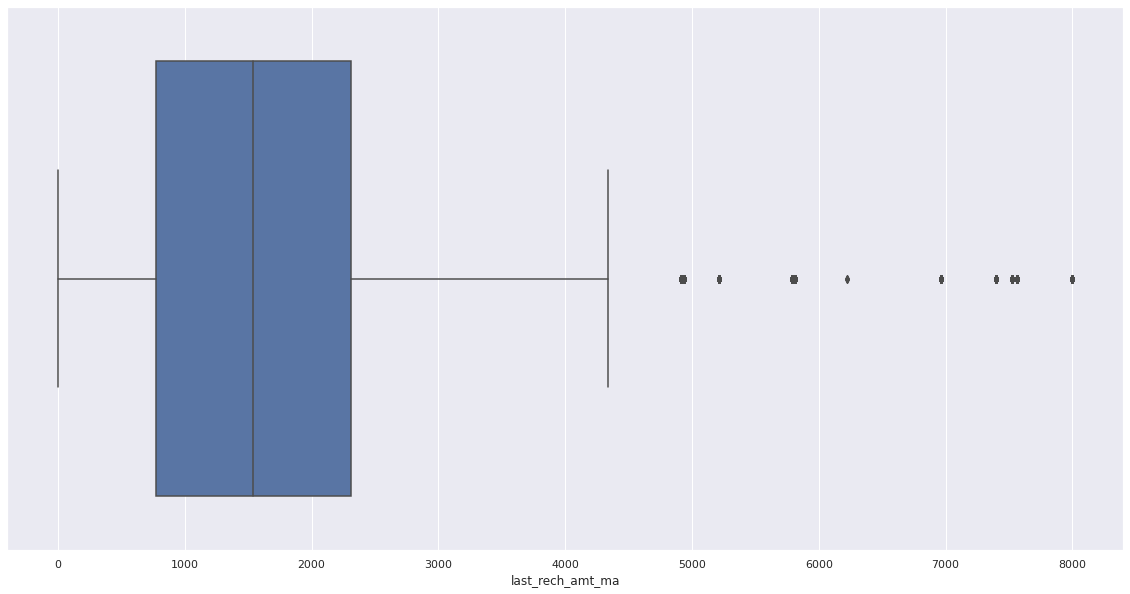

In [91]:
#IQR Treatment 
upperlim=df["last_rech_amt_ma"].quantile(0.95)
print(upperlim)
df.loc[(df["last_rech_amt_ma"]>upperlim),"last_rech_amt_ma"]=upperlim
plt.figure(figsize=(20,10))
sns.boxplot(df["last_rech_amt_ma"])
plt.show() #Improvement shown

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


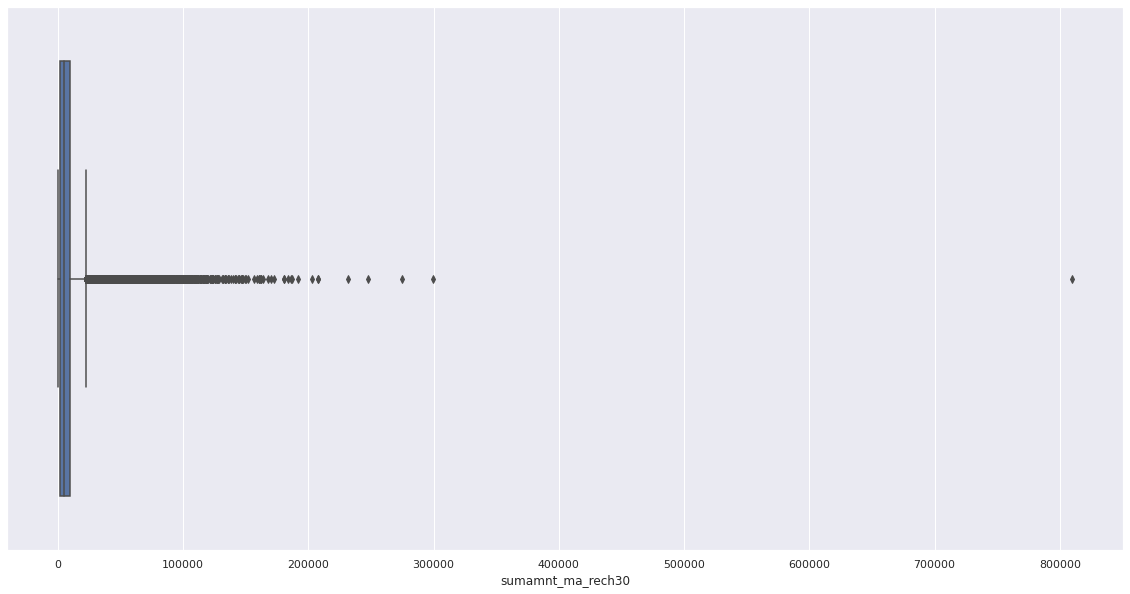

In [94]:
plt.figure(figsize=(20,10))
sns.boxplot(df["sumamnt_ma_rech30"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


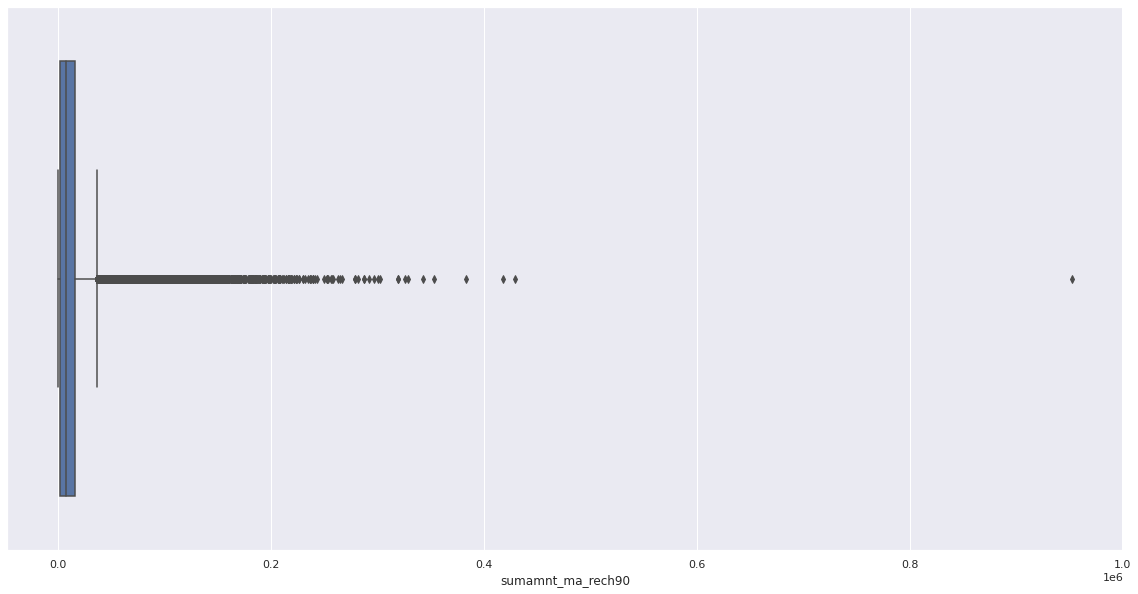

In [92]:
plt.figure(figsize=(20,10))
sns.boxplot(df["sumamnt_ma_rech90"])
plt.show()

24837.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


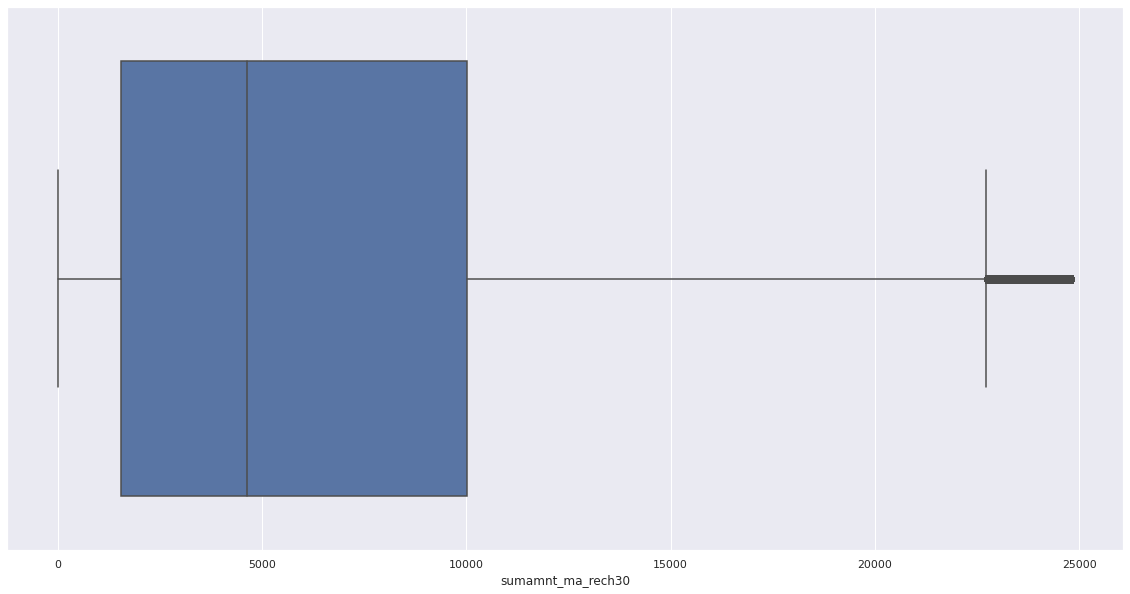

In [95]:
#IQR Treatment 
upperlim=df["sumamnt_ma_rech30"].quantile(0.95)
print(upperlim)
df.loc[(df["sumamnt_ma_rech30"]>upperlim),"sumamnt_ma_rech30"]=upperlim
plt.figure(figsize=(20,10))
sns.boxplot(df["sumamnt_ma_rech30"])
plt.show() #Improvement shown

41780.99999999997


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


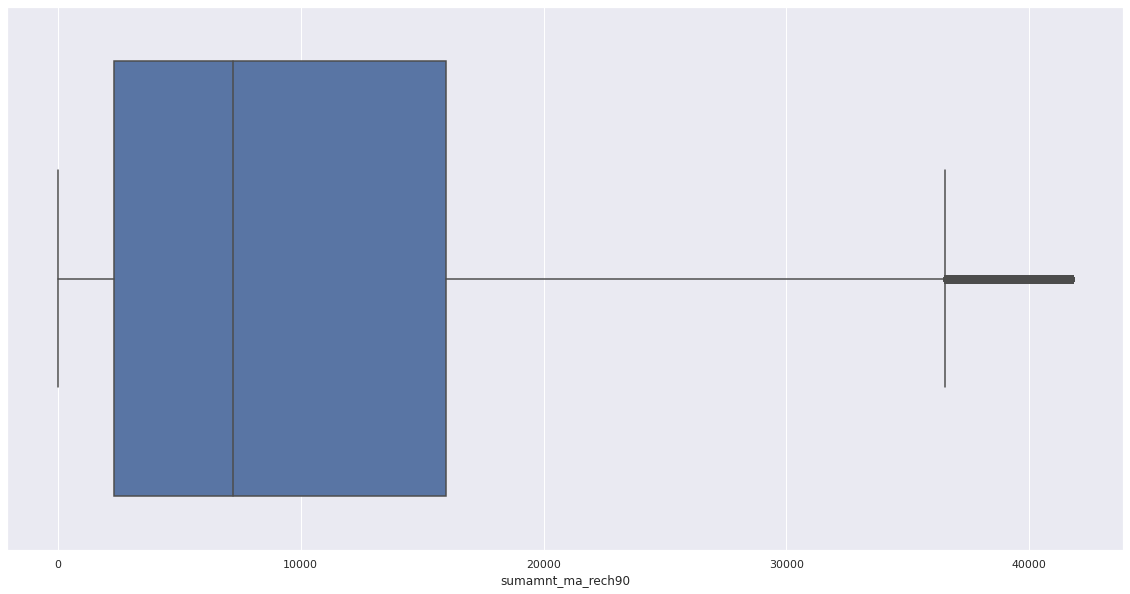

In [93]:
#IQR Treatment 
upperlim=df["sumamnt_ma_rech90"].quantile(0.95)
print(upperlim)
df.loc[(df["sumamnt_ma_rech90"]>upperlim),"sumamnt_ma_rech90"]=upperlim
plt.figure(figsize=(20,10))
sns.boxplot(df["sumamnt_ma_rech90"])
plt.show() #Improvement shown

####Normalization of data

In [96]:
from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()
df_scaled=mm.fit_transform(df)
df_scaled=pd.DataFrame(data=df_scaled,columns=df.columns)
df_scaled.head()

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans90,amnt_loans90,maxamnt_loans90,payback90,pcircle,pdate_day,pdate_month,pdate_year
0,0.0,0.000320,0.119912,0.017765,0.000031,0.192375,0.009852,0.000021,0.123928,0.027982,0.000208,0.005952,0.238636,0.073670,0.027982,0.004981,0.000400,0.027397,0.5,0.169096,0.0,0.633333,0.5,0.0
1,1.0,0.000760,0.463896,0.252084,0.000049,0.723375,0.004926,0.000000,0.232999,0.105218,0.000261,0.002976,0.000000,0.138508,0.105218,0.006266,0.000200,0.027397,1.0,0.000000,0.0,0.300000,1.0,0.0
2,1.0,0.000583,0.056612,0.061472,0.000032,0.192375,0.004926,0.000000,0.061964,0.027982,0.000266,0.002976,0.000000,0.036835,0.027982,0.006393,0.000200,0.013699,0.5,0.000000,0.0,0.600000,1.0,0.0
3,1.0,0.000289,0.004338,0.010887,0.000070,0.118375,0.000000,0.000000,0.000000,0.000000,0.000200,0.002976,0.000000,0.022666,0.017218,0.004861,0.000400,0.027397,0.5,0.000000,0.0,0.166667,0.0,0.0
4,1.0,0.000995,0.009250,0.075046,0.000033,0.288625,0.034483,0.000002,0.806418,0.041982,0.000229,0.023810,0.022727,0.562361,0.052509,0.005641,0.001401,0.095890,0.5,0.013605,0.0,0.700000,0.0,0.0


###Splitting of data

In [97]:
X=df_scaled.drop("label",axis=1)
y=df_scaled["label"]

In [98]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=df_scaled["label"],random_state=21)

In [99]:
(X_train.shape,y_train.shape)

((167674, 23), (167674,))

In [100]:
(X_test.shape,y_test.shape)

((41919, 23), (41919,))

##Processing of ML Models

Stochastic Gradient Descent

In [101]:
from sklearn.linear_model import SGDClassifier

sgd_c=SGDClassifier()
sgd_c.fit(X_train,y_train)
print("Training complete.")

Training complete.


SVM Classifier

In [108]:
from sklearn import svm

support = svm.LinearSVC(random_state=20)
support.fit(X_train,y_train)
print("Training complete.")

Training complete.


###Ensemble Learning

Bagging Classifier

In [102]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model_bg = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))
model_bg.fit(X_train, y_train)
print("Training complete.")

Training complete.


XGBoost Classifer

In [103]:
import xgboost as xgb
model_xgb=xgb.XGBClassifier(random_state=10,learning_rate=0.01)
model_xgb.fit(X_train, y_train)
print("Training complete.")

Training complete.


Gradient Boosting Classifier

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model_gbc.fit(X_train, y_train)
print("Training complete.")

Training complete.


RandomForest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier
cf=RandomForestClassifier()
cf.fit(X_train,y_train)
print("Training complete.")

Training complete.


###Model Evaluation

Stochatic Gradient Descent 

In [106]:
sgd_c.score(X_test,y_test)*100

87.51878623058757

SVM Classifier

In [112]:
support.score(X_test,y_test)*100

87.52355733676853

Bagging Classifier

In [109]:
model_bg.score(X_test,y_test)*100

91.25217681719506

XGBoost Classifier

In [110]:
model_xgb.score(X_test,y_test)*100

90.22638898828693

Grafdient Boosting Classifier

In [111]:
model_gbc.score(X_test,y_test)*100

90.24070230682983

RandomForest Classifier

In [113]:
cf.score(X_test,y_test)*100

92.07996373959303

##Final Conclusion

We can see that with this data, the *RandomForest Classifier* works best, with a score of **90.24%**. Hence, we will use this ML model for deployment. The cells below include a final analysis of the ROC Score of the model:

In [120]:
y_pred=cf.predict(X_test)

In [121]:
predict_prob=support._predict_proba_lr(X_test)
from sklearn.metrics import roc_curve, roc_auc_score
fpr1, tpr1, thresh1 = roc_curve(y_test, predict_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [122]:
auc_score1 = roc_auc_score(y_test, predict_prob[:,1])
print(auc_score1)

0.8203060183722972


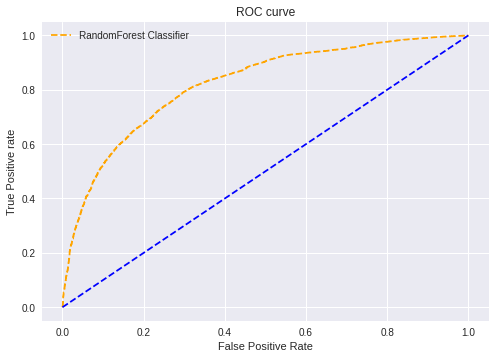

In [123]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()